In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pylab as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

In [2]:
swiggy=pd.read_csv("swiggy.csv",na_values=["NaN", "nan", "NULL", "", "na","NaN "])
swiggy.shape

(45593, 20)

In [3]:
swiggy.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0.0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,(min) 30


In [4]:
swiggy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          43739 non-null  float64
 3   Delivery_person_Ratings      43685 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  43862 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         44992 non-null  object 
 13  Vehicle_conditio

**Notes:**
1. **Delivery_person_ID:** It has some cities names mentioned in it, so we can just extract the name of the cities as it might be helpful.
2. **Weatherconditions:** It has `condition` word written in front of every weather, which can be removed.
3. **Time_taken(min):** It also has the word `min` written in front of the mins which can be removed + then can be converted to integer.
4. **Delivery_person_Age,Delivery_person_Ratings,multiple_deliveries:** They need to be converted to integer and `Rating` to float.

In [5]:
swiggy.rename(columns={
    'Delivery_person_ID':'rider_id',
    'Delivery_person_Age':'rider_age',
    'Delivery_person_Ratings':'rider_rating',
    'Delivery_location_latitude':'Delivery_latitude',
    'Delivery_location_longitude':'Delivery_longitude',
    'Weatherconditions':'weather',
    'Road_traffic_density':'traffic',
    'Type_of_order':'order_type',
    'Type_of_vehicle':'vehicle_type',
    'City':'city_type',
    'Time_taken(min)':'time_taken'
},inplace=True)

In [6]:
swiggy.columns = swiggy.columns.str.lower()

In [7]:
swiggy.isnull().mean()*100

id                      0.000000
rider_id                0.000000
rider_age               4.066414
rider_rating            4.184853
restaurant_latitude     0.000000
restaurant_longitude    0.000000
delivery_latitude       0.000000
delivery_longitude      0.000000
order_date              0.000000
time_orderd             3.796635
time_order_picked       0.000000
weather                 0.000000
traffic                 1.318185
vehicle_condition       0.000000
order_type              0.000000
vehicle_type            0.000000
multiple_deliveries     2.177966
festival                0.500077
city_type               2.631983
time_taken              0.000000
dtype: float64

In [8]:
swiggy.sample(50,random_state=10)

,id,rider_id,rider_age,rider_rating,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,time_orderd,time_order_picked,weather,traffic,vehicle_condition,order_type,vehicle_type,multiple_deliveries,festival,city_type,time_taken
1562,0x4013,JAPRES02DEL02,24.0,4.5,26.914142,75.805704,26.994142,75.885704,06-04-2022,22:35:00,22:50:00,conditions Stormy,Low,2,Meal,electric_scooter,0.0,No,Metropolitian,(min) 13
1624,0x812,JAPRES09DEL01,NaN,NaN,26.911378,75.789034,26.921378,75.799034,24-03-2022,NaN,09:45:00,conditions NaN,NaN,3,Buffet,bicycle,1.0,No,Metropolitian,(min) 13
32598,0x77a7,PUNERES16DEL02,38.0,4.7,18.536718,73.830327,18.666719,73.960327,23-03-2022,21:40:00,21:55:00,conditions Windy,Jam,1,Drinks,scooter,1.0,No,Metropolitian,(min) 25
11470,0x305a,MYSRES11DEL01,35.0,4.8,12.323225,76.630028,12.363225,76.670028,05-03-2022,12:45:00,13:00:00,conditions Sunny,High,0,Buffet,motorcycle,1.0,No,Metropolitian,(min) 20
4976,0x1ebb,MUMRES04DEL02,NaN,NaN,19.254567,72.848923,19.334567,72.928923,04-04-2022,NaN,20:00:00,conditions Fog,Jam,0,Drinks,motorcycle,NaN,No,Metropolitian,(min) 42
10110,0x8664,BANGRES02DEL01,34.0,4.7,12.970221,77.645396,13.080221,77.755396,02-03-2022,19:25:00,19:30:00,conditions Fog,Jam,0,Snack,motorcycle,2.0,Yes,Urban,(min) 40
42749,0x841,PUNERES06DEL01,NaN,NaN,18.546258,73.904337,18.656258,74.014337,16-03-2022,23:10:00,23:25:00,conditions Windy,Low,2,Snack,motorcycle,0.0,No,Metropolitian,(min) 16
36867,0x9f2c,SURRES08DEL01,25.0,4.7,21.173343,72.792731,21.183343,72.802731,28-03-2022,10:45:00,10:55:00,conditions Cloudy,Low,2,Meal,motorcycle,0.0,No,Urban,(min) 13
15132,0xc910,KOCRES15DEL01,26.0,4.7,10.027364,76.308258,10.037364,76.318258,11-02-2022,09:30:00,09:40:00,conditions Windy,Low,2,Drinks,scooter,1.0,No,Metropolitian,(min) 19
3752,0xf7f,JAPRES01DEL01,26.0,5.0,26.905190,75.810753,26.945190,75.850753,03-03-2022,15:00:00,15:10:00,conditions Sandstorms,High,1,Buffet,motorcycle,1.0,No,NaN,(min) 15


In [9]:
swiggy.loc[4976,"rider_age"]

np.float64(nan)

Here, missing values are Nan with an extra space stored as a string, so I will just make changes while reaidng the csv file that would consider them an np.nan. Still, weather has `conditions NaN` which needs to be converted to np.nan

In [10]:
swiggy['weather'].value_counts()

weather
conditions Fog           7654
conditions Stormy        7586
conditions Cloudy        7536
conditions Sandstorms    7495
conditions Windy         7422
conditions Sunny         7284
conditions NaN            616
Name: count, dtype: int64

In [11]:
swiggy['weather']=swiggy['weather'].replace({
    "conditions NaN":np.nan
})

In [12]:
swiggy.isnull().mean()*100

id                      0.000000
rider_id                0.000000
rider_age               4.066414
rider_rating            4.184853
restaurant_latitude     0.000000
restaurant_longitude    0.000000
delivery_latitude       0.000000
delivery_longitude      0.000000
order_date              0.000000
time_orderd             3.796635
time_order_picked       0.000000
weather                 1.351085
traffic                 1.318185
vehicle_condition       0.000000
order_type              0.000000
vehicle_type            0.000000
multiple_deliveries     2.177966
festival                0.500077
city_type               2.631983
time_taken              0.000000
dtype: float64

#### Missing Value Graphs:

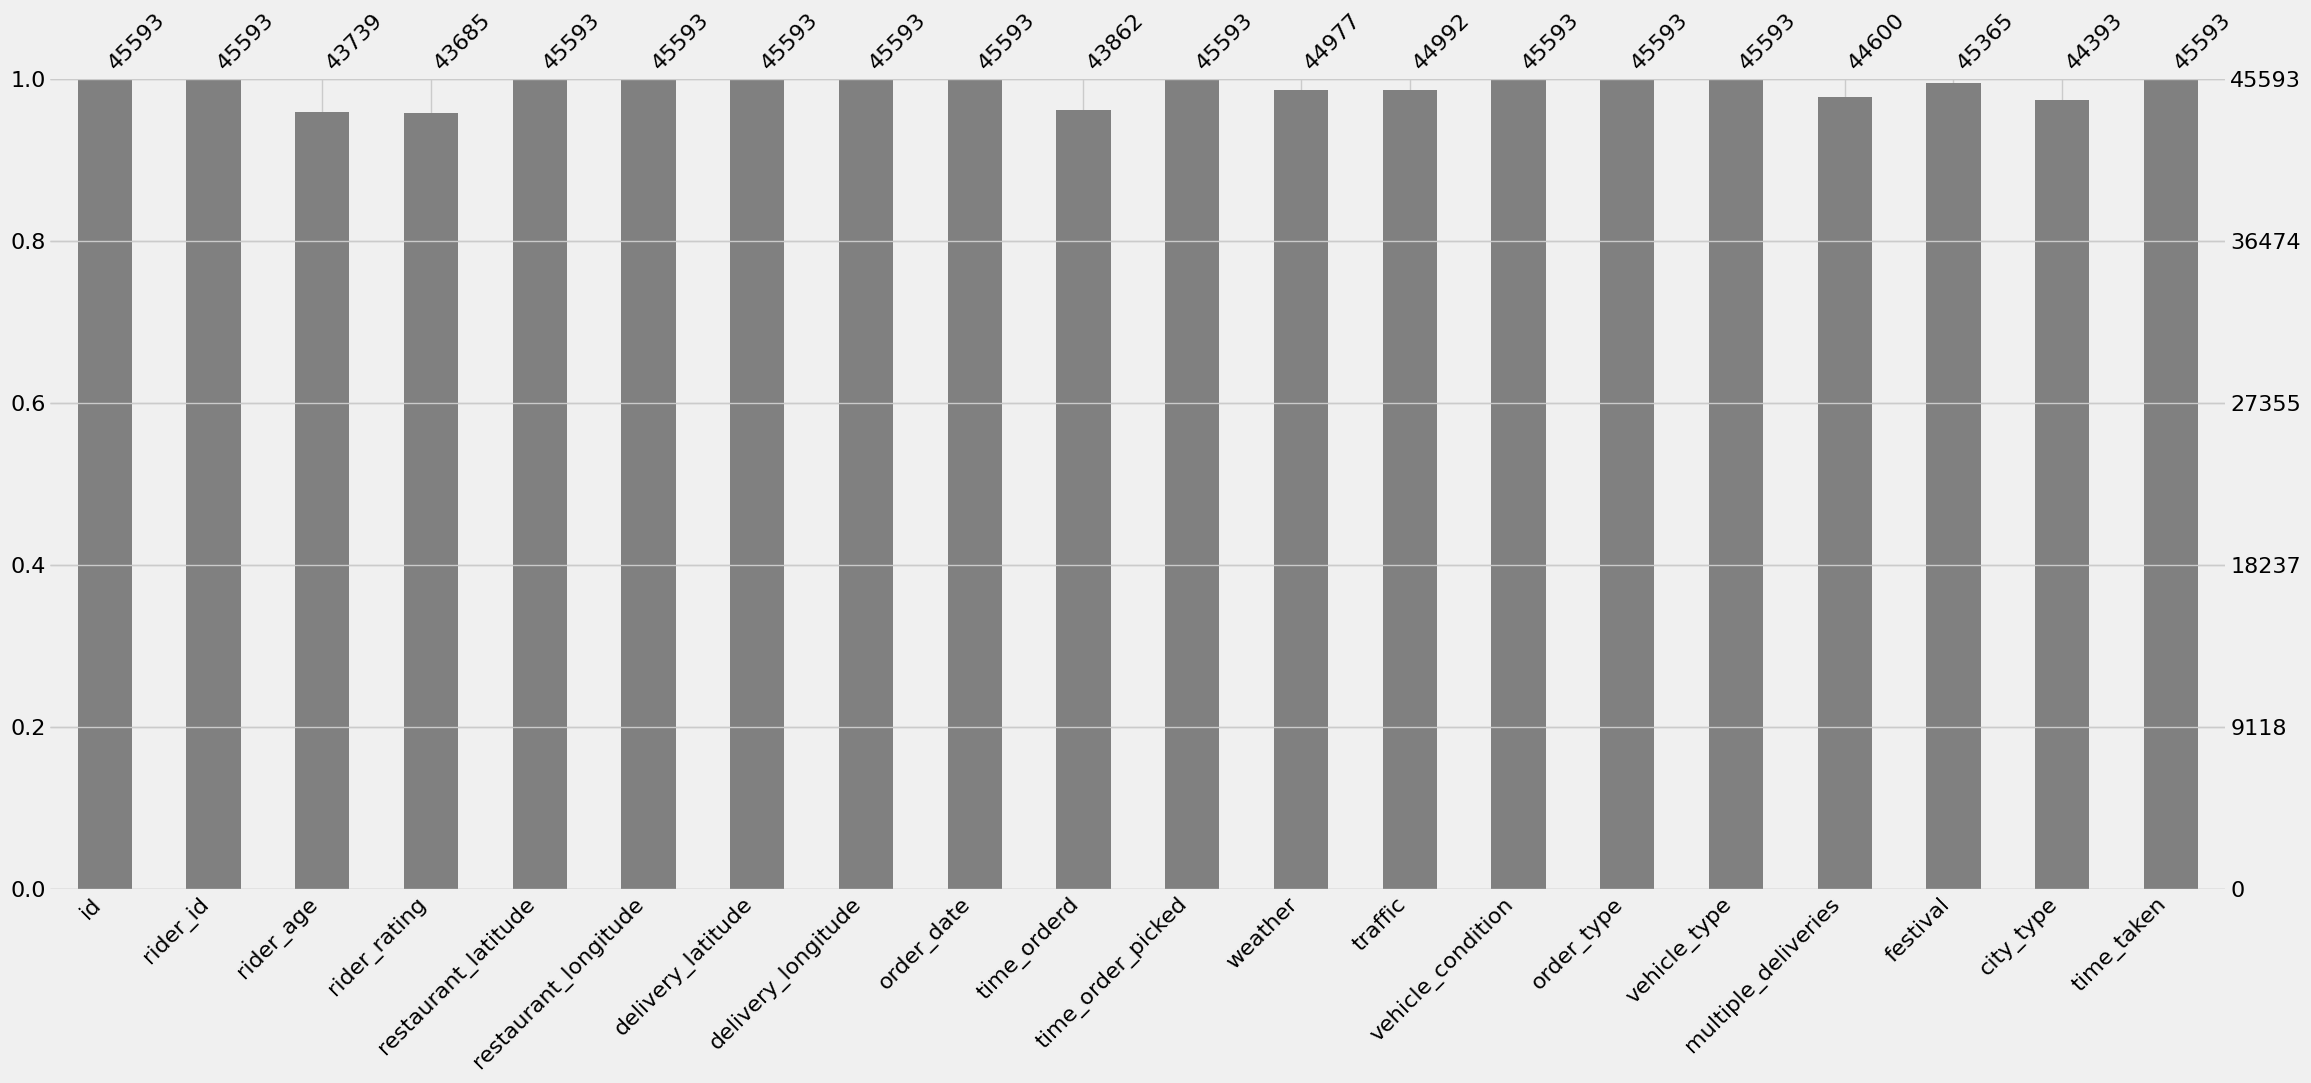

In [13]:
msno.bar(swiggy,color='grey')
plt.show()

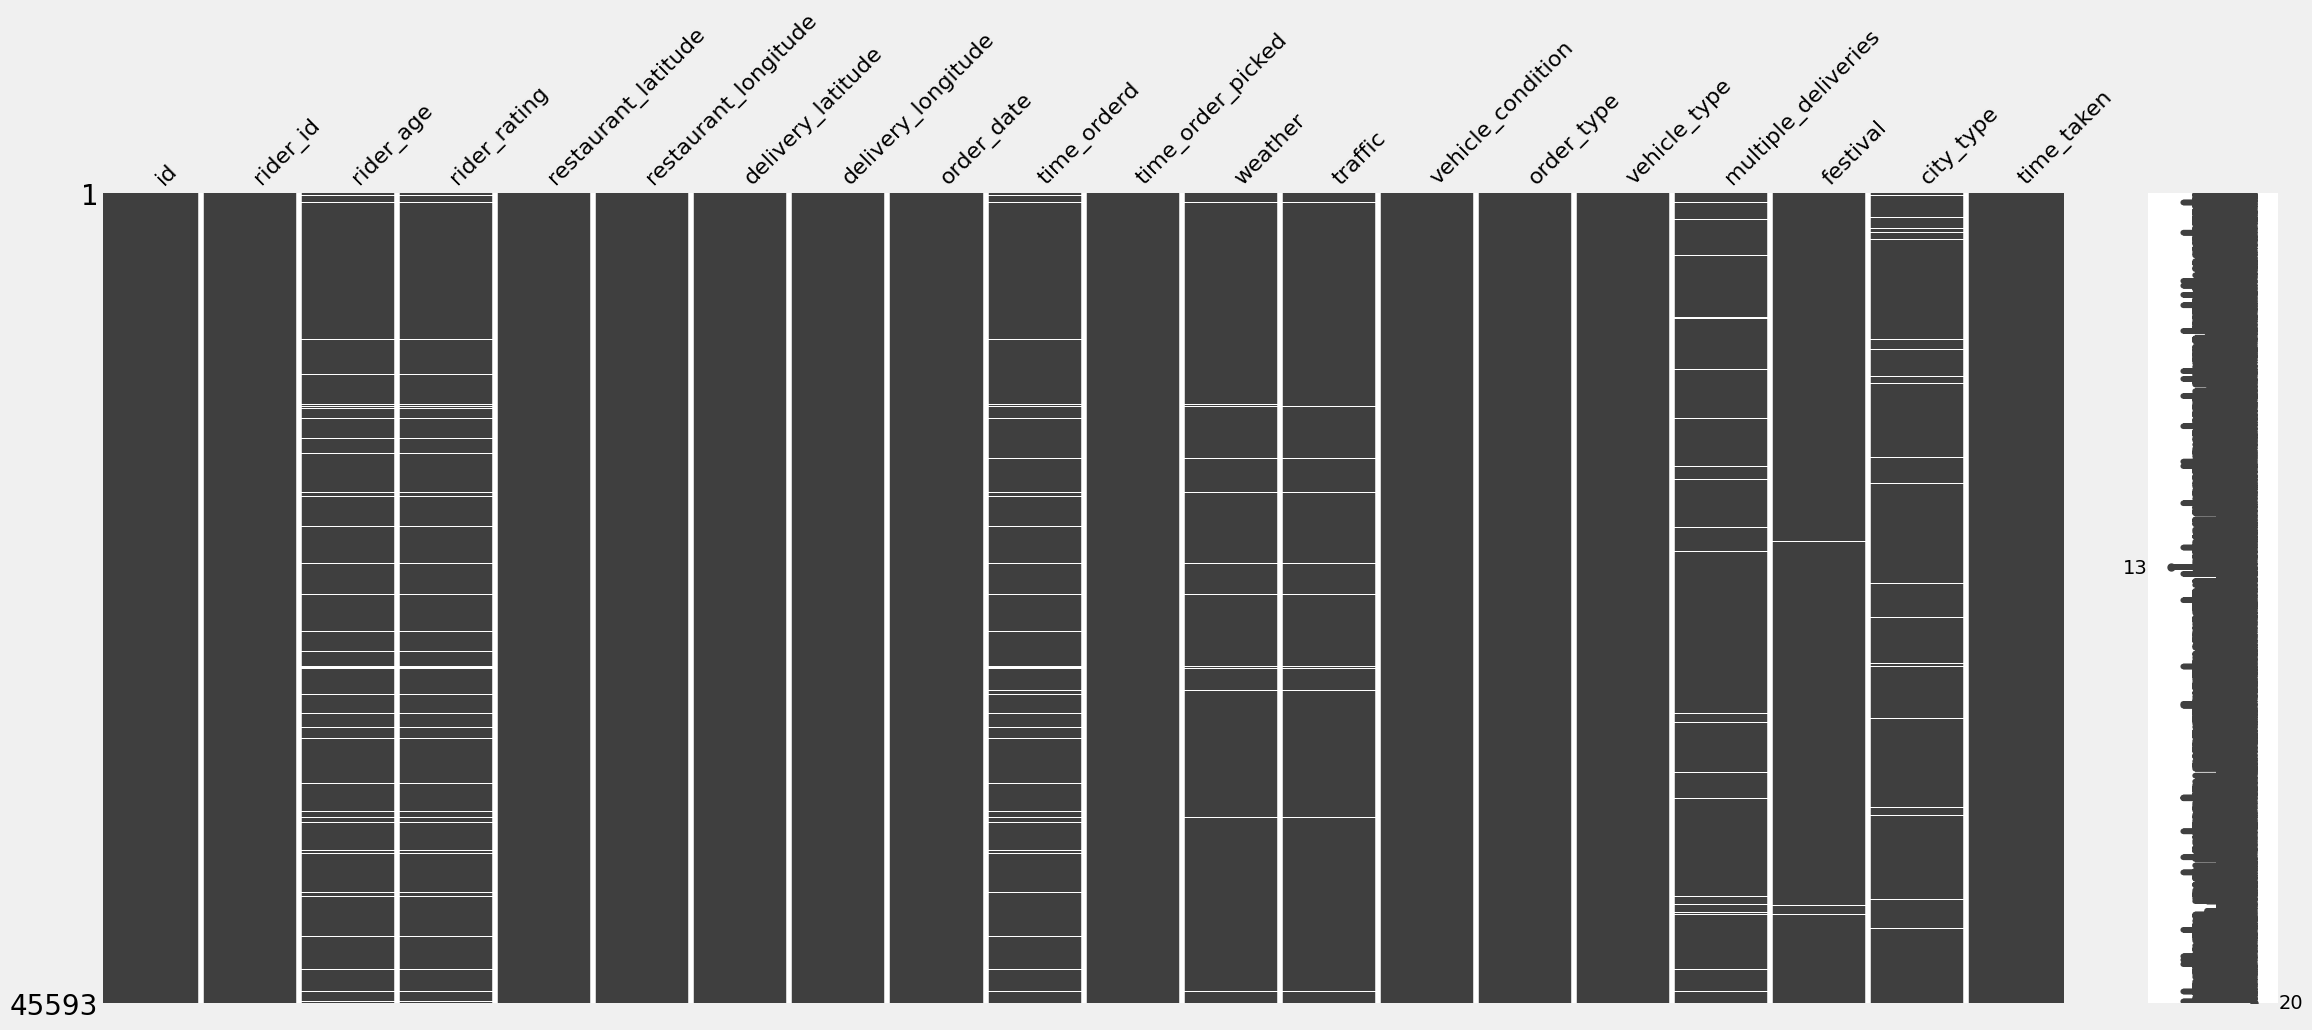

In [14]:
msno.matrix(swiggy)
plt.show()

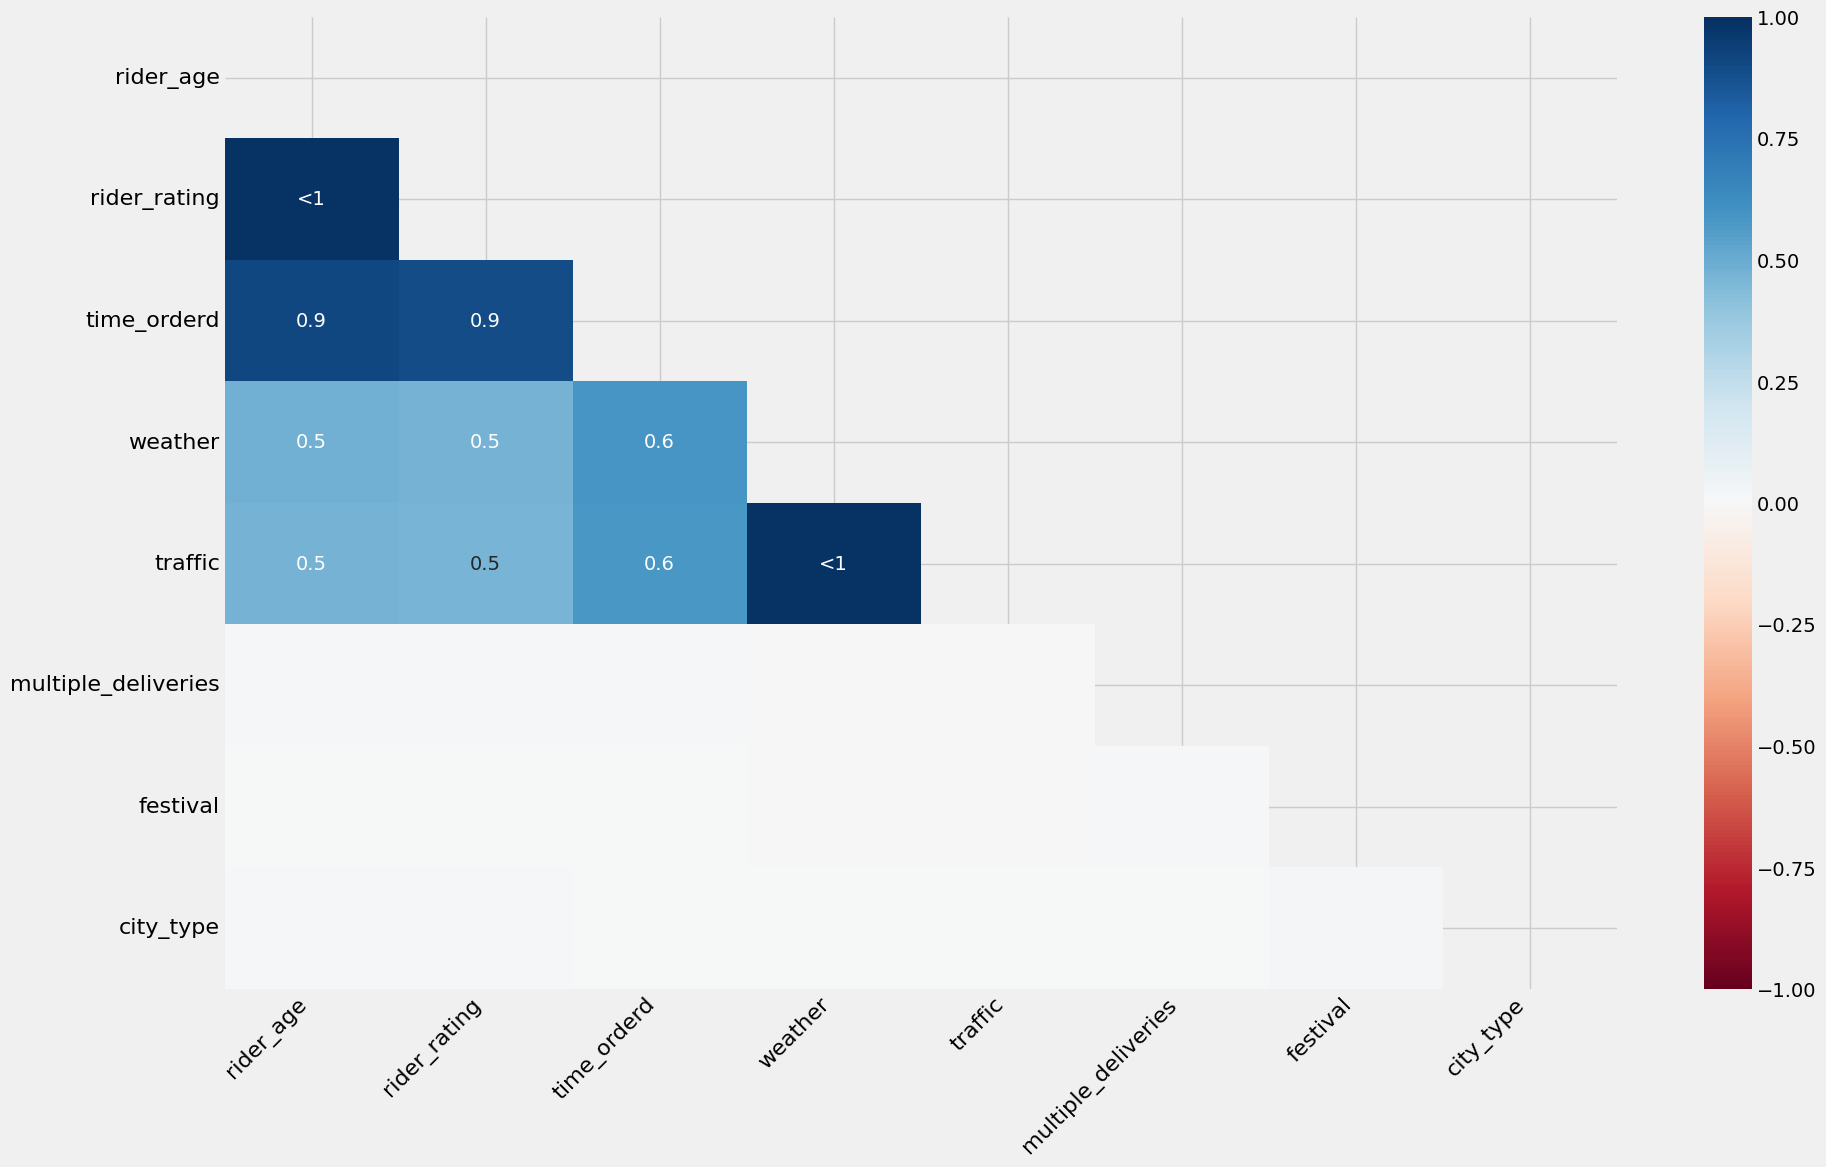

In [15]:
msno.heatmap(swiggy)
plt.show()

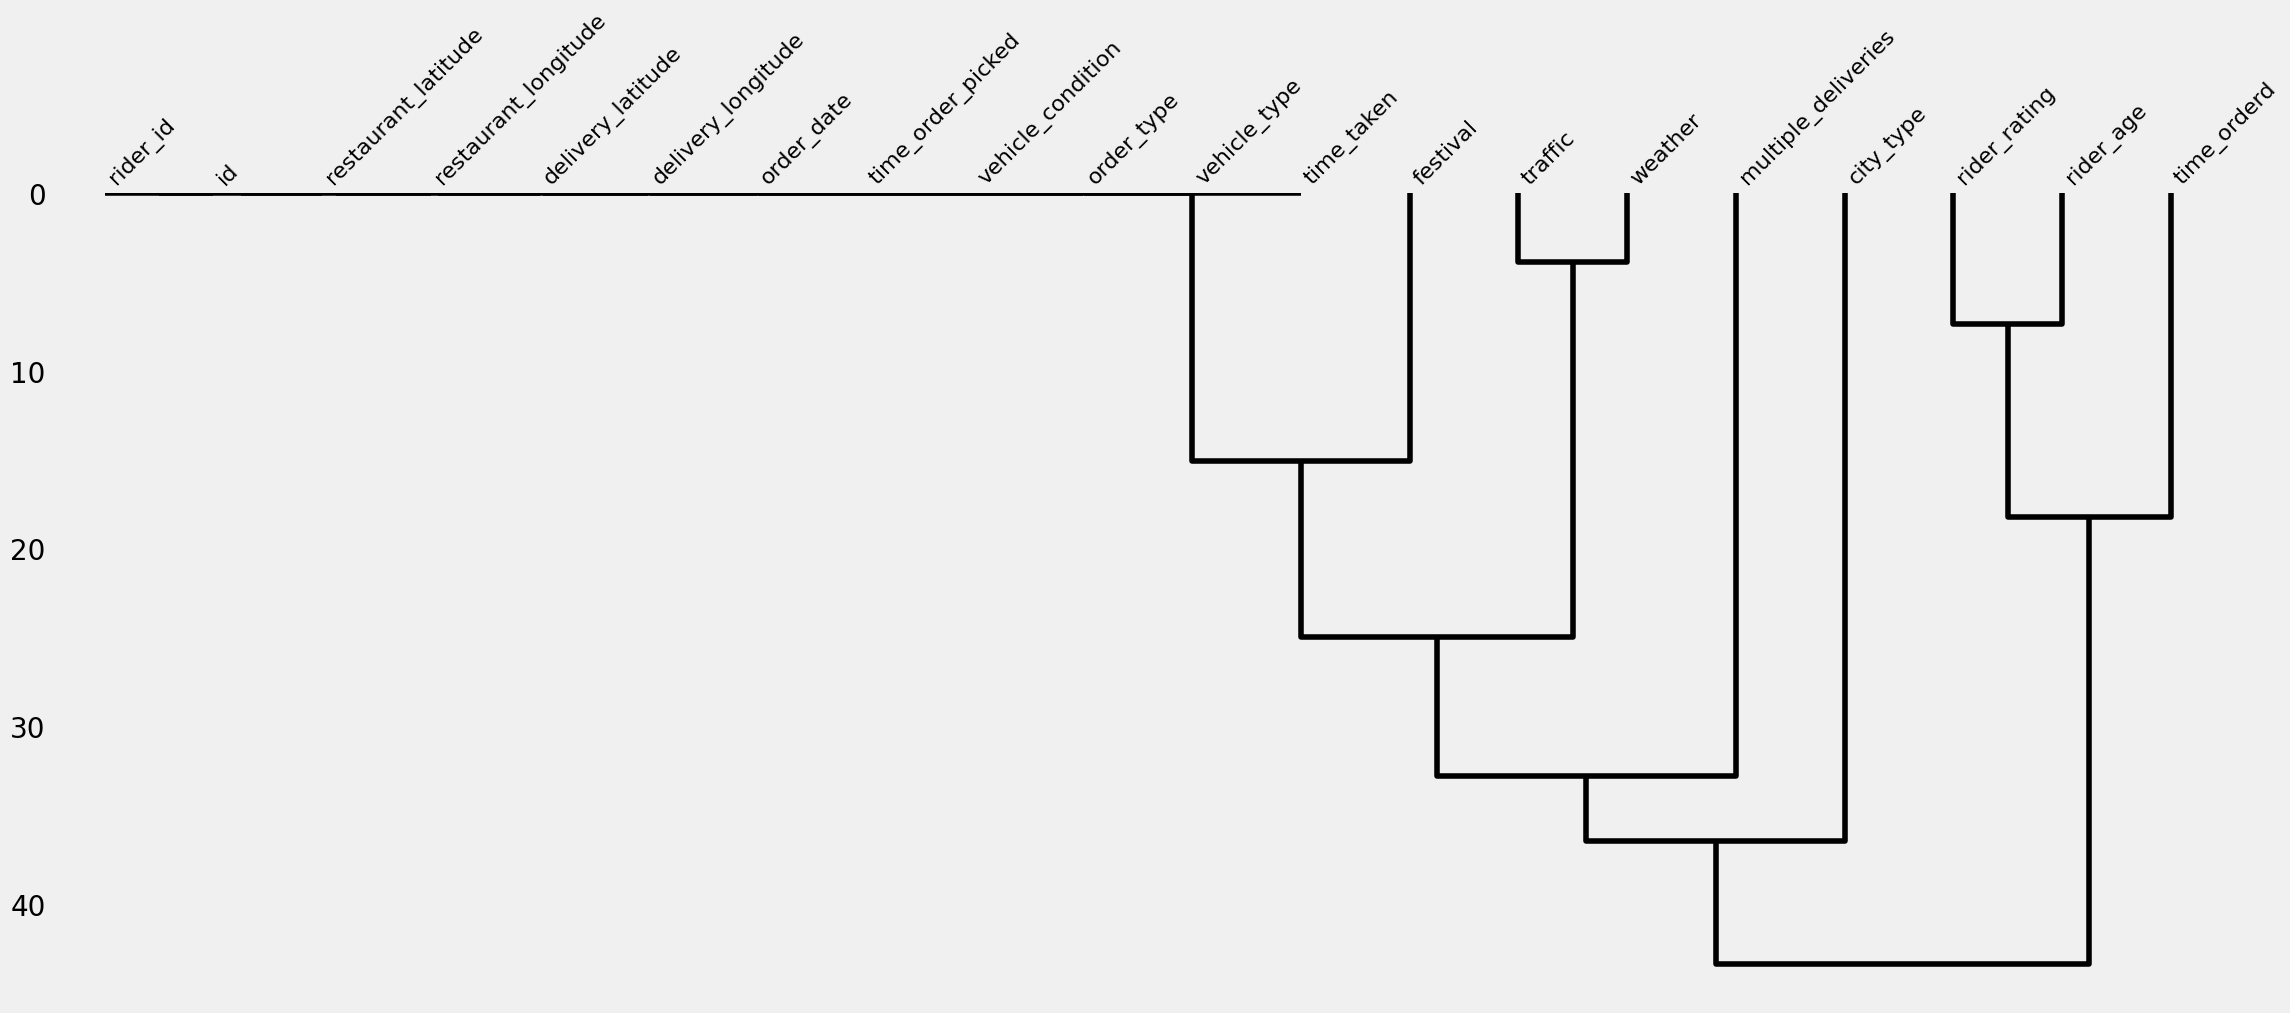

In [16]:
msno.dendrogram(swiggy)
plt.show()

**Notes about missing values:**
1. Most of the rows have rider_age, rider_rating and time_ordered missing at the same place.
2. If the weather data is missing then the traffic values are also missing.


In [17]:
swiggy['rider_id'].sample(5)

9050        KNPRES01DEL01 
40683      PUNERES17DEL01 
32485       JAPRES08DEL03 
14402    RANCHIRES04DEL03 
7543        MUMRES09DEL02 
Name: rider_id, dtype: object

In [18]:
swiggy['city']=swiggy['rider_id'].str.split("RES").str.get(0)

In [19]:
swiggy['rider_age'].describe()

count    43739.000000
mean        29.567137
std          5.815155
min         15.000000
25%         25.000000
50%         30.000000
75%         35.000000
max         50.000000
Name: rider_age, dtype: float64

In [20]:
illegal_riders=swiggy[swiggy['rider_age']<=18]
illegal_riders.sample(10)

,id,rider_id,rider_age,rider_rating,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,time_orderd,...,weather,traffic,vehicle_condition,order_type,vehicle_type,multiple_deliveries,festival,city_type,time_taken,city
16462,0xe4c,MYSRES05DEL03,15.0,1.0,12.323978,76.627961,12.413978,76.717961,27-03-2022,NaN,...,NaN,NaN,3,Meal,electric_scooter,0.0,No,Urban,(min) 24,MYS
37100,0x451,HYDRES14DEL03,15.0,1.0,-17.426228,-78.407495,17.486228,78.467495,19-03-2022,NaN,...,NaN,NaN,3,Buffet,electric_scooter,1.0,No,Urban,(min) 30,HYD
44403,0x2314,VADRES04DEL01,15.0,1.0,0.000000,0.000000,0.070000,0.070000,14-03-2022,NaN,...,NaN,NaN,3,Drinks,scooter,0.0,No,Metropolitian,(min) 34,VAD
28003,0x406,PUNERES14DEL01,15.0,1.0,18.516216,73.842527,18.586216,73.912527,27-03-2022,NaN,...,NaN,NaN,3,Buffet,scooter,1.0,No,Metropolitian,(min) 38,PUNE
39082,0x1144,MYSRES05DEL01,15.0,1.0,12.323978,76.627961,12.433978,76.737961,29-03-2022,NaN,...,NaN,NaN,3,Snack,electric_scooter,0.0,No,Metropolitian,(min) 30,MYS
39073,0x4a6,COIMBRES07DEL02,15.0,1.0,-10.961850,-76.971082,11.091850,77.101082,02-03-2022,NaN,...,NaN,NaN,3,Drinks,electric_scooter,0.0,No,Metropolitian,(min) 24,COIMB
11125,0x40b,SURRES12DEL01,15.0,1.0,-21.183434,-72.814492,21.193434,72.824492,05-03-2022,NaN,...,NaN,NaN,3,Meal,scooter,1.0,No,Urban,(min) 27,SUR
12093,0x523,INDORES03DEL02,15.0,1.0,22.751857,75.866699,22.801857,75.916699,24-03-2022,NaN,...,NaN,NaN,3,Buffet,bicycle,0.0,No,Metropolitian,(min) 28,INDO
23664,0x3f7,CHENRES04DEL01,15.0,1.0,-13.029780,-80.208812,13.139780,80.318812,31-03-2022,NaN,...,NaN,NaN,3,Snack,electric_scooter,1.0,No,Urban,(min) 15,CHEN
27942,0x681,CHENRES07DEL03,15.0,1.0,13.081878,80.248519,13.111878,80.278519,03-04-2022,NaN,...,NaN,NaN,3,Buffet,electric_scooter,1.0,No,Metropolitian,(min) 27,CHEN


In [21]:
def univariate_numeric(feature):
    fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(12,6))

    sns.kdeplot(feature,fill=True,ax=ax[0],color='purple',linewidth=0.8)
    sns.boxplot(feature,ax=ax[1],color='red')

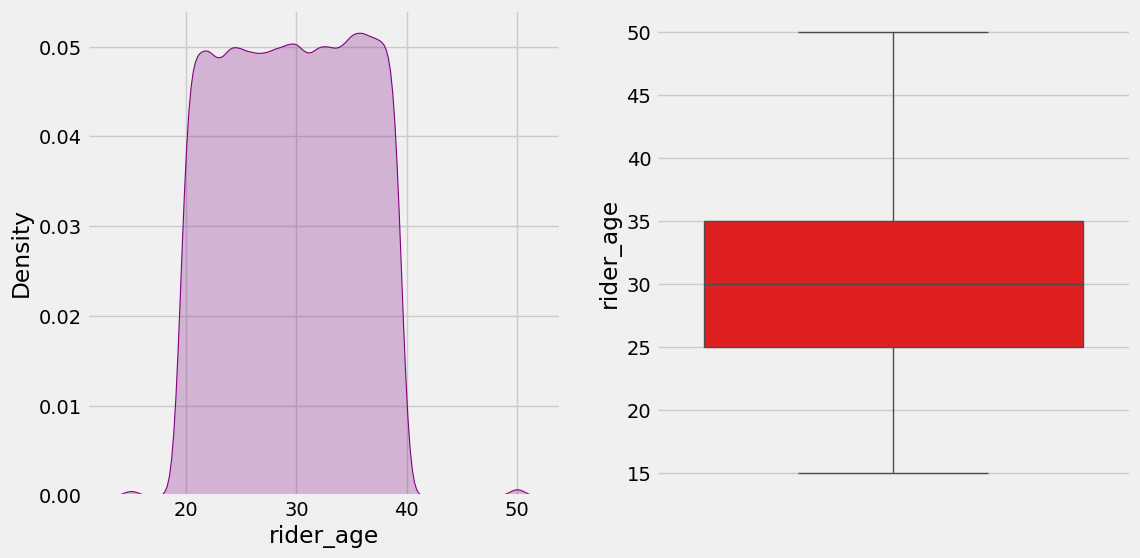

In [22]:
univariate_numeric(swiggy['rider_age'])

**Notes:**
1. All the rider's age is 1, which looks quite suspicious
2. There are also negative and zero longitudes and latitudes for restuarant and delivery location, which are incorrect values.
3. All the time_ordred, weather, and traffic have missing values.
4. The vehicle condition is also 3, which are worst vehicle condition.
5. It looks like a uniform distribution with from riders of age 20 to 40. Unlike, normal distribution, is doesnot have a central peak or tail. Moreover, there does not seem to be any outliers, but still we might remove riders age less than 18 and they hold suspicious values. 

In [23]:
swiggy['rider_rating'].describe()

count    43685.000000
mean         4.633780
std          0.334716
min          1.000000
25%          4.500000
50%          4.700000
75%          4.900000
max          6.000000
Name: rider_rating, dtype: float64

In [24]:
incorrect_rating=swiggy[swiggy['rider_rating']>5]
incorrect_rating.sample(10)

,id,rider_id,rider_age,rider_rating,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,time_orderd,...,weather,traffic,vehicle_condition,order_type,vehicle_type,multiple_deliveries,festival,city_type,time_taken,city
12297,0x940,SURRES02DEL02,50.0,6.0,21.186608,72.794136,21.206608,72.814136,01-03-2022,NaN,...,NaN,NaN,3,Meal,scooter,1.0,No,Urban,(min) 22,SUR
22416,0xc7d6,ALHRES08DEL03,50.0,6.0,25.450329,81.834279,25.590329,81.974279,16-02-2022,NaN,...,NaN,NaN,3,Drinks,scooter,0.0,No,Metropolitian,(min) 29,ALH
10100,0x5b0,MYSRES04DEL01,50.0,6.0,12.308500,76.665808,12.418500,76.775808,18-03-2022,NaN,...,NaN,NaN,3,Snack,electric_scooter,1.0,No,Metropolitian,(min) 35,MYS
16798,0x3fa,RANCHIRES06DEL02,50.0,6.0,23.357804,85.325146,23.377804,85.345146,13-03-2022,NaN,...,NaN,NaN,3,Drinks,scooter,1.0,No,Metropolitian,(min) 22,RANCHI
38007,0xbef2,DEHRES13DEL01,50.0,6.0,30.366322,78.070453,30.436322,78.140453,14-02-2022,NaN,...,NaN,NaN,3,Snack,electric_scooter,1.0,No,Metropolitian,(min) 25,DEH
45332,0x2950,VADRES04DEL02,50.0,6.0,0.000000,0.000000,0.020000,0.020000,19-03-2022,NaN,...,NaN,NaN,3,Drinks,electric_scooter,1.0,No,Urban,(min) 28,VAD
39699,0xa24,RANCHIRES14DEL03,50.0,6.0,0.000000,0.000000,0.030000,0.030000,21-03-2022,NaN,...,NaN,NaN,3,Buffet,bicycle,1.0,No,Metropolitian,(min) 39,RANCHI
7681,0xd42,VADRES09DEL01,50.0,6.0,0.000000,0.000000,0.010000,0.010000,21-03-2022,NaN,...,NaN,NaN,3,Meal,bicycle,1.0,No,Metropolitian,(min) 22,VAD
10737,0xbffc,DEHRES18DEL02,50.0,6.0,0.000000,0.000000,0.020000,0.020000,13-02-2022,NaN,...,NaN,NaN,3,Snack,scooter,0.0,No,Metropolitian,(min) 25,DEH
5362,0x430,BANGRES19DEL01,50.0,6.0,12.914264,77.678400,13.024264,77.788400,06-04-2022,NaN,...,NaN,NaN,3,Meal,electric_scooter,1.0,No,Metropolitian,(min) 18,BANG


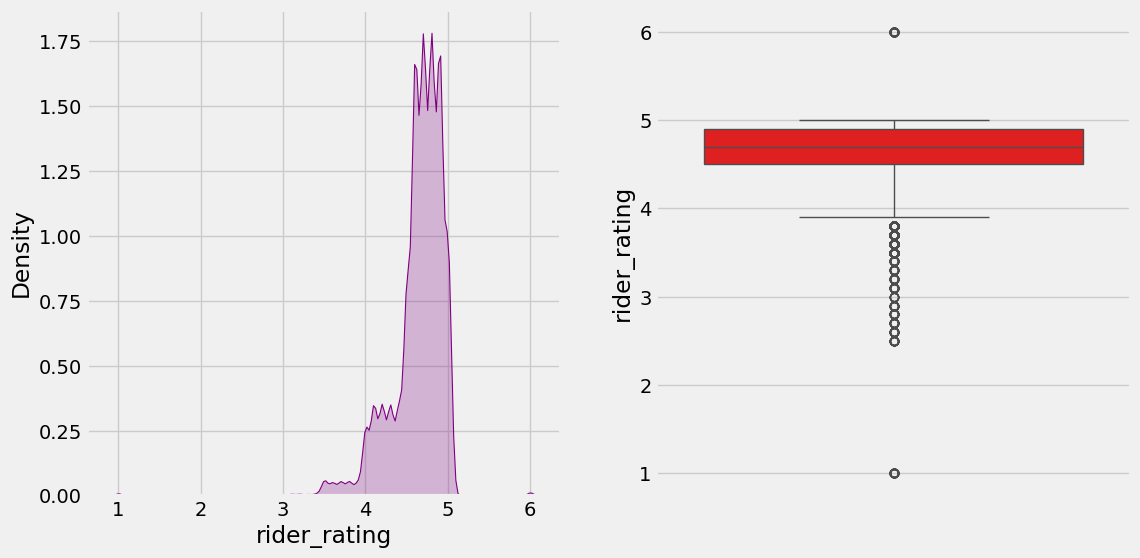

In [25]:
univariate_numeric(swiggy['rider_rating'])

**Notes:**
1. The max rating is 5, but here we have some observations that have a 6 rating and all of them are aged 50 years.
2. There are also negative and zero longitudes and latitudes for restuarant and delivery location, which are incorrect values.
3. All the time_ordred, weather, and traffic have missing values.
4. The vehicle condition is also 3, which are worst vehicle condition.
5. It data is heavily left-skewed, with most of the rating values around 4.5. The one outlier of rating equal to 1 are the values of 15 years old riders which will all be removed. 

In [26]:
swiggy['weather'].unique()

array(['conditions Sunny', 'conditions Stormy', 'conditions Sandstorms',
       'conditions Cloudy', 'conditions Fog', 'conditions Windy', nan],
      dtype=object)

In [27]:
swiggy['weather']=swiggy['weather'].str.split('conditions ').str.get(1).str.lower()

In [28]:
swiggy.sample(5)

,id,rider_id,rider_age,rider_rating,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,time_orderd,...,weather,traffic,vehicle_condition,order_type,vehicle_type,multiple_deliveries,festival,city_type,time_taken,city
21217,0xc1a4,KNPRES17DEL03,26.0,4.6,26.483042,80.317833,26.513042,80.347833,17-02-2022,21:20:00,...,sandstorms,Jam,0,Buffet,motorcycle,2.0,No,Metropolitian,(min) 36,KNP
13830,0x47a8,HYDRES18DEL02,34.0,4.6,17.450851,78.379347,17.580851,78.509347,04-03-2022,17:50:00,...,sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,(min) 39,HYD
7165,0x4c67,BANGRES09DEL02,24.0,4.5,12.934179,77.615797,12.984179,77.665797,11-03-2022,19:25:00,...,stormy,Jam,2,Drinks,scooter,1.0,No,Metropolitian,(min) 28,BANG
40313,0x922e,RANCHIRES19DEL02,36.0,4.1,23.333017,85.317200,23.463017,85.447200,08-03-2022,18:25:00,...,sandstorms,Medium,0,Meal,motorcycle,1.0,No,Metropolitian,(min) 40,RANCHI
313,0x9e8a,PUNERES05DEL02,20.0,4.7,18.543626,73.905101,18.623626,73.985101,23-03-2022,17:10:00,...,sandstorms,Medium,2,Snack,scooter,1.0,No,Urban,(min) 16,PUNE


In [29]:
swiggy['traffic'].unique()

array(['High ', 'Jam ', 'Low ', 'Medium ', nan], dtype=object)

In [30]:
swiggy['traffic']=swiggy['traffic'].str.rstrip().str.lower()

In [31]:
swiggy['vehicle_condition'].value_counts()

vehicle_condition
2    15034
1    15030
0    15009
3      520
Name: count, dtype: int64

In [32]:
swiggy['multiple_deliveries'].value_counts()

multiple_deliveries
1.0    28159
0.0    14095
2.0     1985
3.0      361
Name: count, dtype: int64

In [33]:
swiggy['order_type'].unique()

array(['Snack ', 'Drinks ', 'Buffet ', 'Meal '], dtype=object)

In [34]:
swiggy['order_type']=swiggy['order_type'].str.rstrip().str.lower()

In [35]:
swiggy['vehicle_type'].unique()

array(['motorcycle ', 'scooter ', 'electric_scooter ', 'bicycle '],
      dtype=object)

In [36]:
swiggy['vehicle_type']=swiggy['vehicle_type'].str.rstrip().str.lower()

In [37]:
swiggy['festival'].unique()

array(['No ', 'Yes ', nan], dtype=object)

In [38]:
swiggy['festival']=swiggy['festival'].str.rstrip().str.lower()

In [39]:
swiggy['city_type'].unique()

array(['Urban ', 'Metropolitian ', 'Semi-Urban ', nan], dtype=object)

In [40]:
swiggy['city_type']=swiggy['city_type'].str.rstrip().str.lower()

In [41]:
swiggy['time_taken'].unique()

array(['(min) 24', '(min) 33', '(min) 26', '(min) 21', '(min) 30',
       '(min) 40', '(min) 32', '(min) 34', '(min) 46', '(min) 23',
       '(min) 20', '(min) 41', '(min) 15', '(min) 36', '(min) 39',
       '(min) 18', '(min) 38', '(min) 47', '(min) 12', '(min) 22',
       '(min) 25', '(min) 35', '(min) 10', '(min) 19', '(min) 11',
       '(min) 28', '(min) 52', '(min) 16', '(min) 27', '(min) 49',
       '(min) 17', '(min) 14', '(min) 37', '(min) 44', '(min) 42',
       '(min) 31', '(min) 13', '(min) 29', '(min) 50', '(min) 43',
       '(min) 48', '(min) 54', '(min) 53', '(min) 45', '(min) 51'],
      dtype=object)

In [42]:
swiggy['time_taken']=swiggy['time_taken'].str.replace("(min)","").astype(int)

#### Working with coordinate systems:

In [43]:
location=swiggy.iloc[:,4:8]
location

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
0,22.745049,75.892471,22.765049,75.912471
1,12.913041,77.683237,13.043041,77.813237
2,12.914264,77.678400,12.924264,77.688400
3,11.003669,76.976494,11.053669,77.026494
4,12.972793,80.249982,13.012793,80.289982
...,...,...,...,...
45588,26.902328,75.794257,26.912328,75.804257
45589,0.000000,0.000000,0.070000,0.070000
45590,13.022394,80.242439,13.052394,80.272439
45591,11.001753,76.986241,11.041753,77.026241


In [44]:
location.describe().T

,count,mean,std,min,25%,50%,75%,max
restaurant_latitude,45593.0,17.017729,8.185109,-30.905562,12.933284,18.546947,22.728163,30.914057
restaurant_longitude,45593.0,70.231332,22.883647,-88.366217,73.170000,75.898497,78.044095,88.433452
delivery_latitude,45593.0,17.465186,7.335122,0.010000,12.988453,18.633934,22.785049,31.054057
delivery_longitude,45593.0,70.845702,21.118812,0.010000,73.280000,76.002574,78.107044,88.563452


India lies to the north of the equator between `6° 44′` and `35° 30′` north latitude and `68° 7′` and `97° 25′` east longitude.

In [45]:
problematic_location=location[location['restaurant_latitude']<7]
problematic_location

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
33,0.0,0.0,0.11,0.11
52,0.0,0.0,0.03,0.03
57,0.0,0.0,0.08,0.08
59,0.0,0.0,0.06,0.06
67,0.0,0.0,0.02,0.02
...,...,...,...,...
45569,0.0,0.0,0.07,0.07
45576,0.0,0.0,0.13,0.13
45577,0.0,0.0,0.09,0.09
45579,0.0,0.0,0.05,0.05


In [46]:
problematic_location.describe().T

,count,mean,std,min,25%,50%,75%,max
restaurant_latitude,4071.0,-2.149416,6.537913,-30.905562,0.00,0.00,0.00,0.000000
restaurant_longitude,4071.0,2.068601,25.270676,-88.366217,0.00,0.00,0.00,88.433452
delivery_latitude,4071.0,2.212538,6.538283,0.010000,0.04,0.07,0.11,31.045562
delivery_longitude,4071.0,8.299885,23.980011,0.010000,0.04,0.07,0.11,88.523452


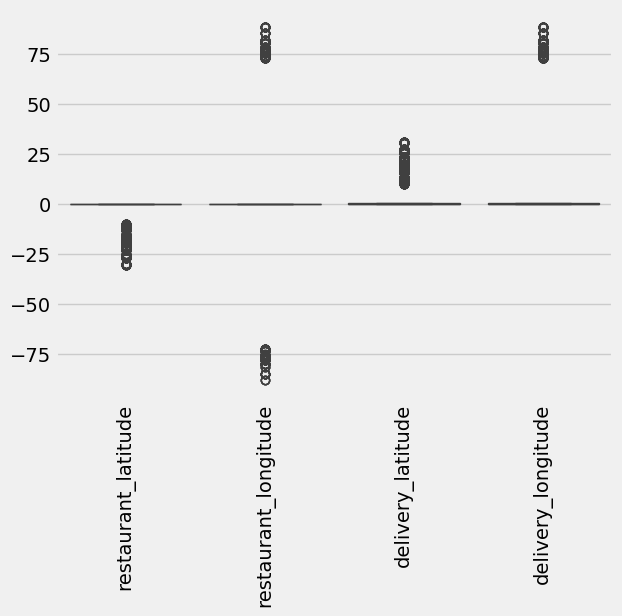

In [47]:
sns.boxplot(problematic_location)
plt.xticks(rotation=90)
plt.show()

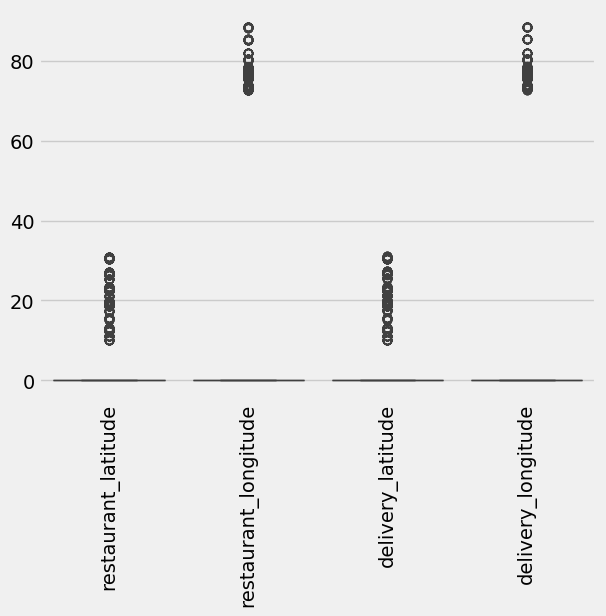

In [48]:
sns.boxplot(problematic_location.abs())
plt.xticks(rotation=90)
plt.show()

In [49]:
problematic_location.abs().describe().T

,count,mean,std,min,25%,50%,75%,max
restaurant_latitude,4071.0,2.149416,6.537913,0.00,0.00,0.00,0.00,30.905562
restaurant_longitude,4071.0,8.236763,23.979706,0.00,0.00,0.00,0.00,88.433452
delivery_latitude,4071.0,2.212538,6.538283,0.01,0.04,0.07,0.11,31.045562
delivery_longitude,4071.0,8.299885,23.980011,0.01,0.04,0.07,0.11,88.523452


In [50]:
problematic_location=problematic_location.abs()

In [51]:
problematic_location[problematic_location['restaurant_latitude']<1]

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
33,0.0,0.0,0.11,0.11
52,0.0,0.0,0.03,0.03
57,0.0,0.0,0.08,0.08
59,0.0,0.0,0.06,0.06
67,0.0,0.0,0.02,0.02
...,...,...,...,...
45569,0.0,0.0,0.07,0.07
45576,0.0,0.0,0.13,0.13
45577,0.0,0.0,0.09,0.09
45579,0.0,0.0,0.05,0.05


In [52]:
problematic_location['restaurant_latitude']=np.where(problematic_location['restaurant_latitude']<1,np.nan,problematic_location['restaurant_latitude'])
problematic_location['restaurant_longitude']=np.where(problematic_location['restaurant_longitude']<1,np.nan,problematic_location['restaurant_longitude'])
problematic_location['delivery_latitude']=np.where(problematic_location['delivery_latitude']<1,np.nan,problematic_location['delivery_latitude'])
problematic_location['delivery_longitude']=np.where(problematic_location['delivery_longitude']<1,np.nan,problematic_location['delivery_longitude'])

In [53]:
problematic_location.isnull().sum()

restaurant_latitude     3640
restaurant_longitude    3640
delivery_latitude       3640
delivery_longitude      3640
dtype: int64

In [54]:
swiggy.sample(4)

,id,rider_id,rider_age,rider_rating,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,time_orderd,...,weather,traffic,vehicle_condition,order_type,vehicle_type,multiple_deliveries,festival,city_type,time_taken,city
42700,0x20bc,HYDRES02DEL02,21.0,4.8,17.412330,78.449654,17.542330,78.579654,27-03-2022,23:25:00,...,sandstorms,low,2,snack,motorcycle,1.0,no,urban,12,HYD
8625,0x5e29,MYSRES19DEL01,23.0,4.8,12.334022,76.618203,12.404022,76.688203,04-04-2022,19:30:00,...,sunny,jam,0,snack,motorcycle,1.0,no,metropolitian,21,MYS
19158,0xbac9,CHENRES19DEL02,34.0,4.9,12.986047,80.218114,13.066047,80.298114,10-03-2022,23:45:00,...,sunny,low,1,meal,scooter,1.0,no,metropolitian,20,CHEN
2634,0x211d,HYDRES01DEL03,33.0,4.6,17.410371,78.437225,17.440371,78.467225,28-03-2022,18:50:00,...,stormy,medium,1,buffet,motorcycle,0.0,no,metropolitian,26,HYD


In [55]:
swiggy['order_date']

0        19-03-2022
1        25-03-2022
2        19-03-2022
3        05-04-2022
4        26-03-2022
            ...    
45588    24-03-2022
45589    16-02-2022
45590    11-03-2022
45591    07-03-2022
45592    02-03-2022
Name: order_date, Length: 45593, dtype: object

In [56]:
def extract_time(ser):
    date_col=pd.to_datetime(ser,dayfirst=True)
    return (
        pd.DataFrame(
            {"day":date_col.dt.day,
            "month":date_col.dt.month,
            "is_weekend":date_col.dt.day_name().isin(['Saturday','Sunday']).astype(int)
            }
    ))
    

In [57]:
extract_time(swiggy['order_date'])

,day,month,is_weekend
0,19,3,1
1,25,3,0
2,19,3,1
3,5,4,0
4,26,3,1
...,...,...,...
45588,24,3,0
45589,16,2,0
45590,11,3,0
45591,7,3,0


In [58]:
swiggy.columns

Index(['id', 'rider_id', 'rider_age', 'rider_rating', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'time_orderd', 'time_order_picked', 'weather', 'traffic',
       'vehicle_condition', 'order_type', 'vehicle_type',
       'multiple_deliveries', 'festival', 'city_type', 'time_taken', 'city'],
      dtype='object')

In [59]:
swiggy['time_order_picked']

0        11:45:00
1        19:50:00
2        08:45:00
3        18:10:00
4        13:45:00
           ...   
45588    11:45:00
45589    20:10:00
45590    00:05:00
45591    13:40:00
45592    17:15:00
Name: time_order_picked, Length: 45593, dtype: object

In [60]:
swiggy['ordered_time']=pd.to_datetime(swiggy['time_orderd']).dt.hour
swiggy['ordered_time']

C:\Users\khadk\AppData\Local\Temp\ipykernel_8256\1001300140.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  swiggy['ordered_time']=pd.to_datetime(swiggy['time_orderd']).dt.hour


0        11.0
1        19.0
2         8.0
3        18.0
4        13.0
         ... 
45588    11.0
45589    19.0
45590    23.0
45591    13.0
45592    17.0
Name: ordered_time, Length: 45593, dtype: float64

In [61]:
swiggy.head(3)

,id,rider_id,rider_age,rider_rating,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,time_orderd,...,traffic,vehicle_condition,order_type,vehicle_type,multiple_deliveries,festival,city_type,time_taken,city,ordered_time
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,...,high,2,snack,motorcycle,0.0,no,urban,24,INDO,11.0
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,...,jam,2,snack,scooter,1.0,no,metropolitian,33,BANG,19.0
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,...,low,0,drinks,motorcycle,1.0,no,urban,26,BANG,8.0


In [62]:
swiggy['picked_time']=pd.to_datetime(swiggy['time_order_picked']).dt.hour
swiggy['picked_time']

C:\Users\khadk\AppData\Local\Temp\ipykernel_8256\446254405.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  swiggy['picked_time']=pd.to_datetime(swiggy['time_order_picked']).dt.hour


0        11
1        19
2         8
3        18
4        13
         ..
45588    11
45589    20
45590     0
45591    13
45592    17
Name: picked_time, Length: 45593, dtype: int32

In [63]:
swiggy['time_order_picked']=pd.to_datetime(swiggy['time_order_picked'])
swiggy['time_orderd']=pd.to_datetime(swiggy['time_orderd'])

C:\Users\khadk\AppData\Local\Temp\ipykernel_8256\434530213.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  swiggy['time_order_picked']=pd.to_datetime(swiggy['time_order_picked'])
C:\Users\khadk\AppData\Local\Temp\ipykernel_8256\434530213.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  swiggy['time_orderd']=pd.to_datetime(swiggy['time_orderd'])


In [64]:
swiggy['pickup_time']=(swiggy['time_order_picked']-swiggy['time_orderd']).dt.seconds/60

In [65]:
swiggy['pickup_time']

0        15.0
1         5.0
2        15.0
3        10.0
4        15.0
         ... 
45588    10.0
45589    15.0
45590    15.0
45591     5.0
45592     5.0
Name: pickup_time, Length: 45593, dtype: float64